# Geographic Plotting with Geopandas

In [1]:
#%pip install geopandas
#%pip install descartes

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

%matplotlib inline

In [2]:
# https://ourworldindata.org/obesity
df = pd.read_csv('overweight.csv')
df.head()

,Entity,Code,Year,Share of adults that are overweight (%)
0,Afghanistan,AFG,1975,5.3
1,Afghanistan,AFG,1976,5.5
2,Afghanistan,AFG,1977,5.7
3,Afghanistan,AFG,1978,5.9
4,Afghanistan,AFG,1979,6.1


In [3]:
columns = list(df.columns)
columns[3] = 'Overweight'
df.columns = columns
df.head()

,Entity,Code,Year,Overweight
0,Afghanistan,AFG,1975,5.3
1,Afghanistan,AFG,1976,5.5
2,Afghanistan,AFG,1977,5.7
3,Afghanistan,AFG,1978,5.9
4,Afghanistan,AFG,1979,6.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      8316 non-null   object 
 1   Code        8022 non-null   object 
 2   Year        8316 non-null   int64  
 3   Overweight  8316 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 260.0+ KB


In [5]:
shapefile = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'
gdf = gpd.read_file(shapefile)
gdf.head(2)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."


In [6]:
gdf = gdf[['ADMIN', 'ADM0_A3', 'geometry']]
gdf.head()

,ADMIN,ADM0_A3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [7]:
df_2016 = df[df['Year'] == 2016]

In [8]:
merged = gdf.merge(df_2016, left_on='ADM0_A3', right_on='Code')
merged.head()

,ADMIN,ADM0_A3,geometry,Entity,Code,Year,Overweight
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,FJI,2016,63.4
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,TZA,2016,24.5
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,CAN,2016,67.5
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,USA,2016,70.2
4,Kazakhstan,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,KAZ,2016,53.9


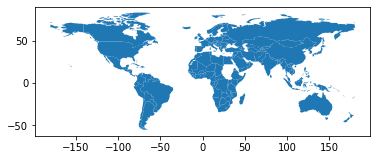

In [9]:
merged.plot()

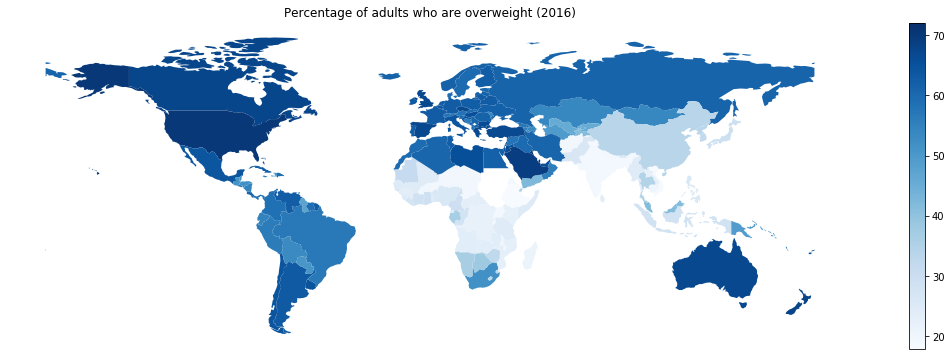

In [10]:
ax = merged.plot(column='Overweight', cmap='Blues', figsize=(20,6), legend=True)
ax.set_title('Percentage of adults who are overweight (2016)')
ax.set_axis_off()

## London

In [11]:
# https://data.london.gov.uk/dataset/london-borough-profiles
london_data_url = "https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv"
london = pd.read_csv(london_data_url, encoding='latin')
london.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,.,.,.,.,.
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0,100,0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,.,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


In [12]:
# https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

london_shapefile = "statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
london_gdf = gpd.read_file(london_shapefile)
london_gdf.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18..."


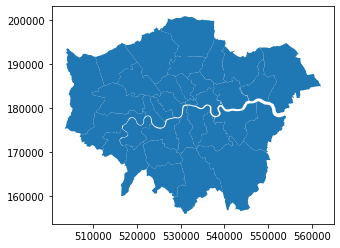

In [13]:
london_gdf.plot()

In [14]:
merged = london_gdf.merge(london, left_on='GSS_CODE', right_on='Code')
merged.head(2)

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,Code,Area_name,...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,Kingston upon Thames,E09000021,3726.117,0.0,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",E09000021,Kingston upon Thames,...,7.4,3.3,16.9,4.9,141,Cons,58.3,4.2,37.5,43.1
1,Croydon,E09000008,8649.441,0.0,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",E09000008,Croydon,...,7.2,3.3,24.5,6.5,178,Lab,42.9,57.1,0,38.6


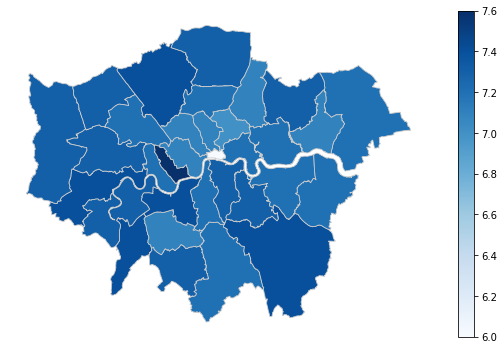

In [15]:
variable = 'Happiness_score_2011-14_(out_of_10)'
ax = merged.plot(column=variable, cmap='Blues', figsize=(10, 6),
                 linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_axis_off()

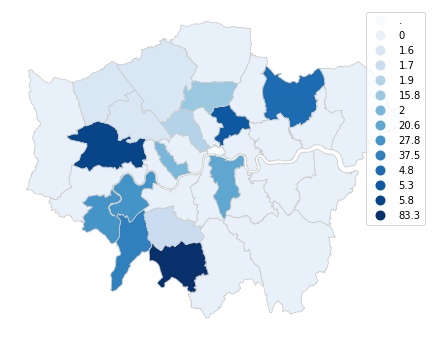

In [16]:
variable = 'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'
ax = merged.plot(column=variable, cmap='Blues', figsize=(10, 6),
                 linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_axis_off()

In [17]:
def to_float(x):
    try:
        return float(x)
    except:
        return 0.0

variable = 'Proportion_of_seats_won_by_Labour_in_2014_election'
merged[variable] = merged[variable].apply(to_float)
variable = 'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'
merged[variable] = merged[variable].apply(to_float)
variable = 'Proportion_of_seats_won_by_Conservatives_in_2014_election'
merged[variable] = merged[variable].apply(to_float)

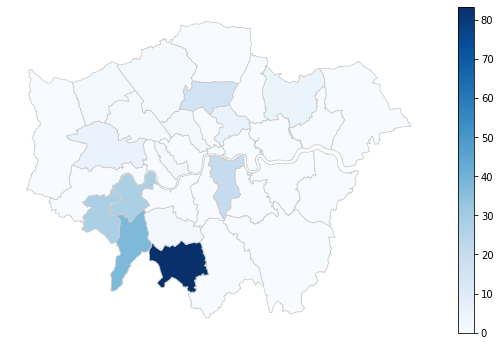

In [18]:
variable = 'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'
ax = merged.plot(column=variable, cmap='Blues', figsize=(10, 6),
                 linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_axis_off()

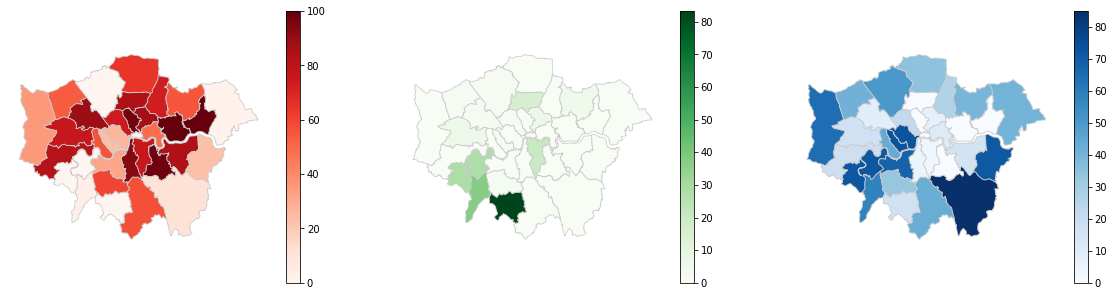

In [19]:
fig, axes = plt.subplots(ncols=3, figsize=(20,5))

variable = 'Proportion_of_seats_won_by_Labour_in_2014_election'
ax = merged.plot(column=variable, ax=axes[0], cmap='Reds',
                 linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_axis_off()

variable = 'Proportion_of_seats_won_by_Lib_Dems_in_2014_election'
ax = merged.plot(column=variable, ax=axes[1], cmap='Greens',
                 linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_axis_off()

variable = 'Proportion_of_seats_won_by_Conservatives_in_2014_election'
ax = merged.plot(column=variable, ax=axes[2], cmap='Blues',
                 linewidth=0.8, edgecolor='0.8', legend=True)
ax.set_axis_off()